In [2]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
import time
import yfinance as yf

def download_stock_data(ticker, start_date, end_date, retries=5, delay=5):
    for i in range(retries):
        try:
            data = yf.download(ticker, start=start_date, end=end_date)
            return data
        except Exception as e:
            print(f"Attempt {i + 1} failed: {e}")
            if i < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                print("Max retries reached. Exiting.")
                return None

# Download Apple stock data
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'
data = download_stock_data(ticker, start_date, end_date)

if data is not None:
    print(data.head())
else:
    print("Failed to download data.")

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []


In [5]:
pip install pandas_datareader

In [7]:
pip install alpha_vantage

In [9]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Replace with your Alpha Vantage API key
api_key = 'JZ9A81CK1C06X3YW'

# Initialize the TimeSeries class
ts = TimeSeries(key=api_key, output_format='pandas')

# Get daily data for Apple (AAPL)
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

# Print the data
print(data.head())

            1. open   2. high  3. low  4. close   5. volume
date                                                       
2025-02-18   244.15  245.1800  241.84    244.47  48822491.0
2025-02-14   241.25  245.5500  240.99    244.60  40896227.0
2025-02-13   236.91  242.3399  235.57    241.53  53614054.0
2025-02-12   231.20  236.9600  230.68    236.87  45243292.0
2025-02-11   228.20  235.2300  228.13    232.62  53718362.0


In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use only the '4. close' column for prediction (Alpha Vantage format)
data = data[['4. close']]

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create a training dataset
training_data_len = int(np.ceil(len(scaled_data) * 0.8))  # Use 80% of the data for training
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

# Use a 60-day window to predict the next day's closing price
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use only the '4. close' column for prediction (Alpha Vantage format)
data = data[['4. close']]

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create a training dataset
training_data_len = int(np.ceil(len(scaled_data) * 0.8))  # Use 80% of the data for training
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

# Use a 60-day window to predict the next day's closing price
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3D for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()

# First LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))  # Second LSTM layer
model.add(Dense(25))  # Dense layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5031/5031 ━━━━━━━━━━━━━━━━━━━━ 149s 29ms/step - loss: 0.0020


In [13]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]  # Actual values for comparison

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data to be 3D for LSTM [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Undo scaling
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Undo scaling

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'Root Mean Squared Error: {rmse}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Root Mean Squared Error: 6.6678177821718325


<ipython-input-16-c9b4fabd41d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


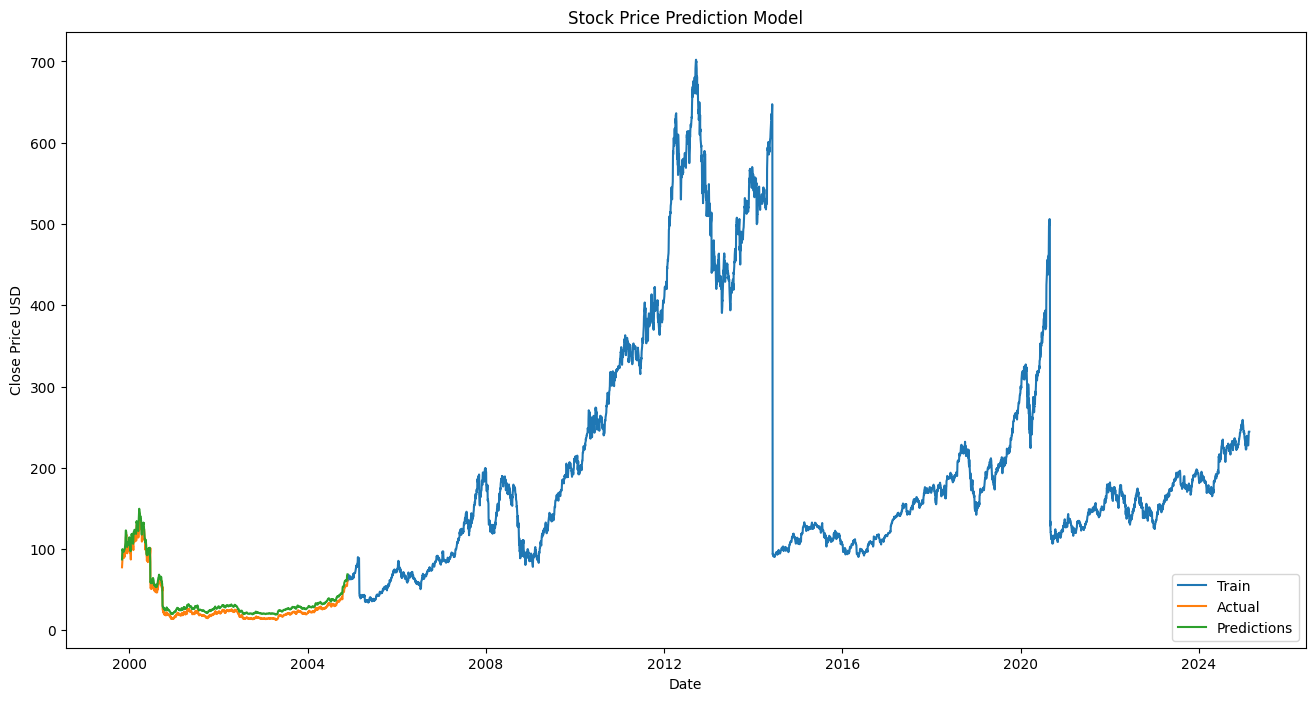

In [16]:
import matplotlib.pyplot as plt

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['4. close'])
plt.plot(valid[['4. close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [33]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Use the most recent 60 days of data as input for future predictions
last_60_days = scaled_data[-60:]

# Create a list to store predictions
future_predictions = []

# Define the target date (March 31, 2025)
target_date = datetime(2025, 3, 31)

# Calculate the number of days to predict
today = datetime.today()
days_to_predict = (target_date - today).days

# Ensure days_to_predict is positive
if days_to_predict < 0:
    raise ValueError("The target date is in the past. Please choose a future date.")

# Iteratively predict future prices
for _ in range(days_to_predict):
    # Reshape the input data for the model
    X_input = np.array(last_60_days)
    X_input = np.reshape(X_input, (1, X_input.shape[0], 1))

    # Predict the next day's price
    predicted_price = model.predict(X_input)

    # Append the predicted price to the input data
    last_60_days = np.append(last_60_days, predicted_price)
    last_60_days = last_60_days[1:]  # Keep only the most recent 60 days

    # Store the predicted price (inverse transform to get the actual price)
    future_predictions.append(scaler.inverse_transform(predicted_price)[0][0])

# Create a date range for the predictions
future_dates = pd.date_range(start=today, periods=days_to_predict, freq='D')

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions
})

# Filter predictions for the year 2025
predictions_2025 = predictions_df[predictions_df['Date'].dt.year == 2025]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

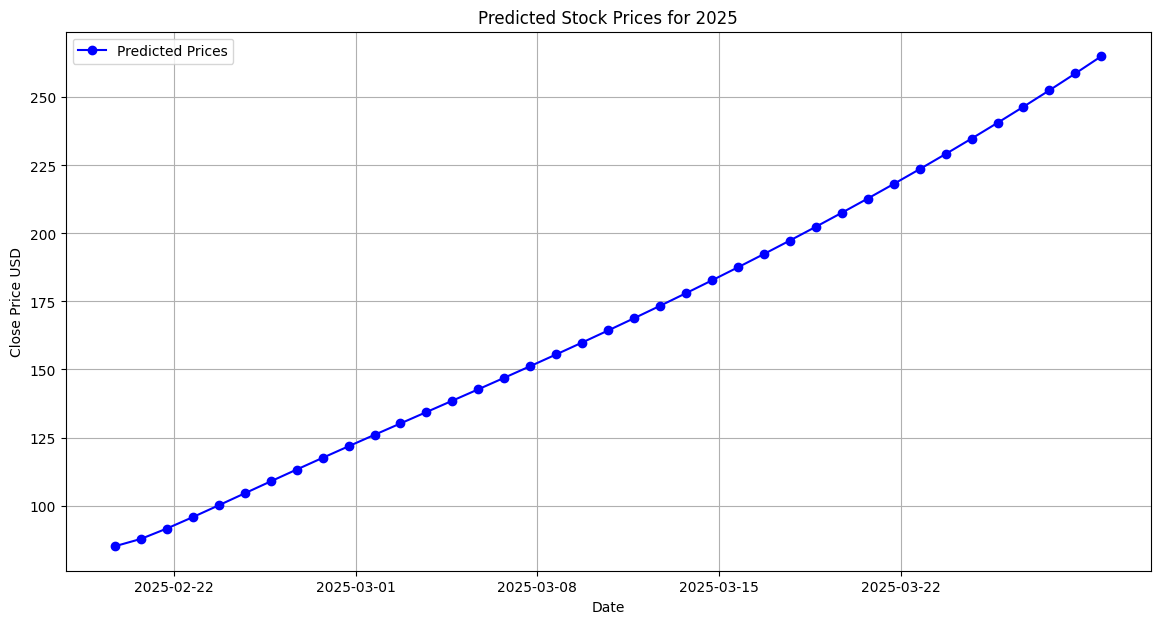

In [34]:
# Plot the predictions for 2025
plt.figure(figsize=(14, 7))
plt.plot(predictions_2025['Date'], predictions_2025['Predicted_Price'], label='Predicted Prices', color='blue', marker='o')
plt.title(f"Predicted Stock Prices for 2025")
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.grid()
plt.show()

In [37]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Use the most recent 60 days of data as input for future predictions
last_60_days = scaled_data[-90:]

# Create a list to store predictions
future_predictions = []

# Define the target date (March 31, 2025)
target_date = datetime(2026, 3, 31)

# Calculate the number of days to predict
today = datetime.today()
days_to_predict = (target_date - today).days

# Ensure days_to_predict is positive
if days_to_predict < 0:
    raise ValueError("The target date is in the past. Please choose a future date.")

# Iteratively predict future prices
for _ in range(days_to_predict):
    # Reshape the input data for the model
    X_input = np.array(last_60_days)
    X_input = np.reshape(X_input, (1, X_input.shape[0], 1))

    # Predict the next day's price
    predicted_price = model.predict(X_input)

    # Append the predicted price to the input data
    last_60_days = np.append(last_60_days, predicted_price)
    last_60_days = last_60_days[1:]  # Keep only the most recent 60 days

    # Store the predicted price (inverse transform to get the actual price)
    future_predictions.append(scaler.inverse_transform(predicted_price)[0][0])

# Create a date range for the predictions
future_dates = pd.date_range(start=today, periods=days_to_predict, freq='D')

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions
})

# Filter predictions for the year 2025
predictions_2025 = predictions_df[predictions_df['Date'].dt.year == 2025]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

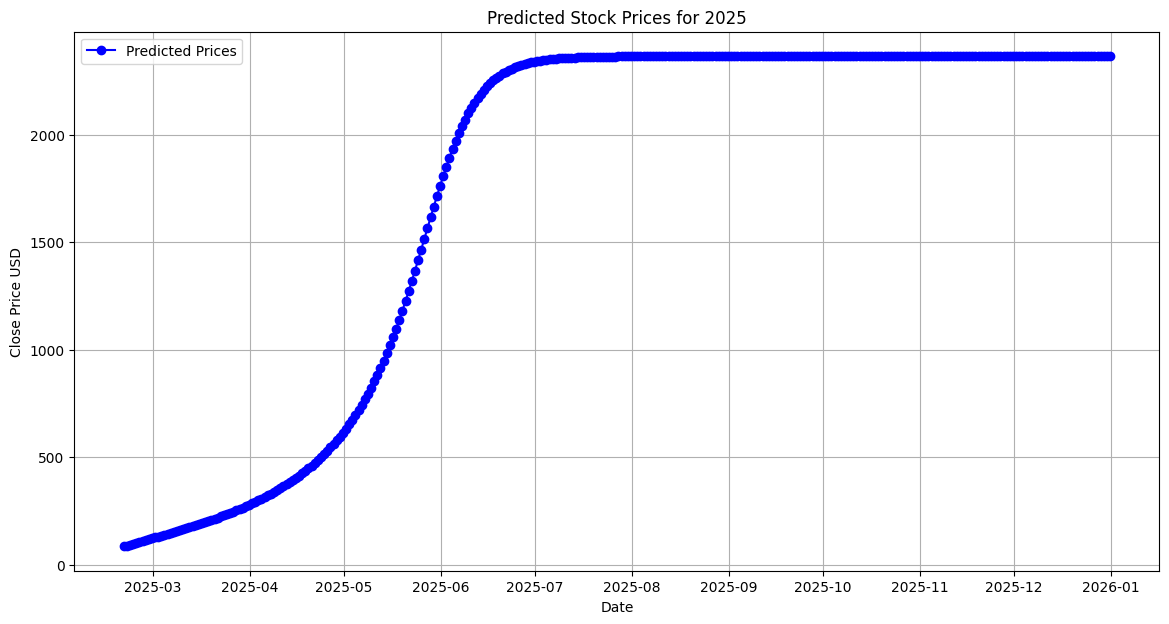

In [38]:
# Plot the predictions for 2026
plt.figure(figsize=(14, 7))
plt.plot(predictions_2025['Date'], predictions_2025['Predicted_Price'], label='Predicted Prices', color='blue', marker='o')
plt.title(f"Predicted Stock Prices for 2025")
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.grid()
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have the following variables:
# y_test: Actual values (ground truth)
# predictions: Predicted values

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, predictions)  # R-squared

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 6.301351992620312
Mean Squared Error (MSE): 44.45979397624689
Root Mean Squared Error (RMSE): 6.6678177821718325
R-squared (R²): 0.9502265347477745


In [40]:
# After making predictions on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Undo scaling

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

Model Evaluation Metrics:
Mean Absolute Error (MAE): 6.301351992620312
Mean Squared Error (MSE): 44.45979397624689
Root Mean Squared Error (RMSE): 6.6678177821718325
R-squared (R²): 0.9502265347477745


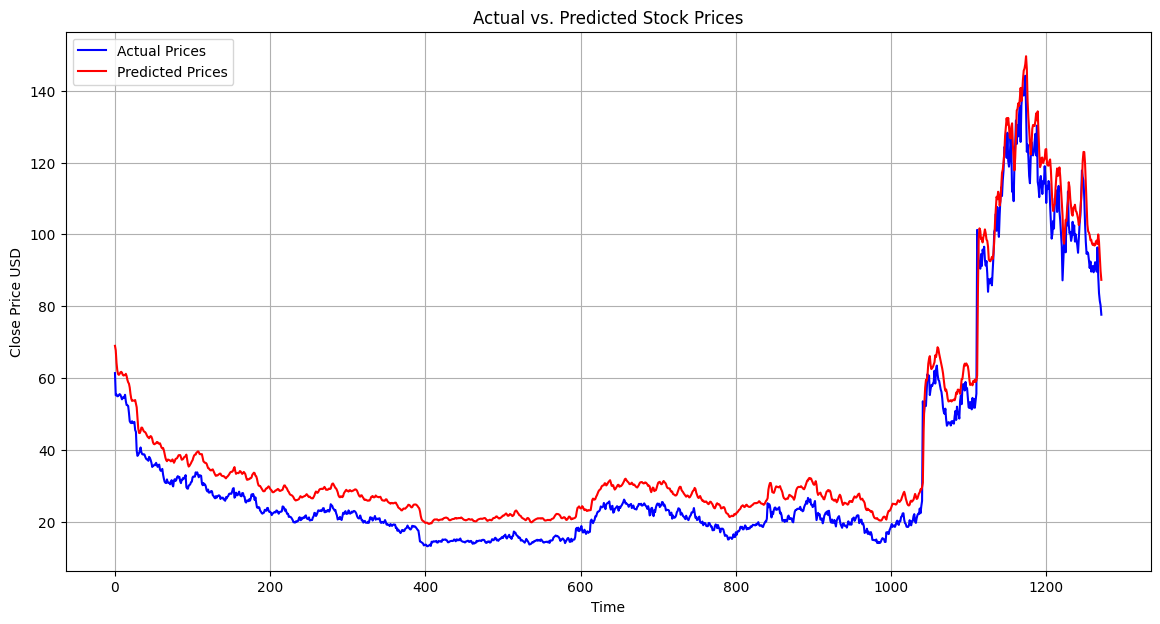

In [41]:
# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Close Price USD')
plt.legend()
plt.grid()
plt.show()